In [1]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
search_log_url = "http://agnessearch.nl/logs/search.log"
search_log = pd.read_csv(search_log_url)
search_log[['date','time']] = search_log['datetime'].str.split(' ',expand=True)
search_log

,session_id,search_id,datetime,searchterm,startyear,endyear,artefact,context,species,fuzzyness,number_of_results,num_per_page,results_page,date,time
0,6553ccad15373,6553da5fd33de,2023-11-14 20:36:47,ploegspo*,NaN,NaN,NaN,NaN,NaN,0.0,3848,10,2,2023-11-14,20:36:47
1,6553ccad15373,6553dab540e75,2023-11-14 20:38:13,as,NaN,NaN,NaN,NaN,NaN,0.0,10000,10,1,2023-11-14,20:38:13
2,6553ccad15373,6553db64543fd,2023-11-14 20:41:08,as,NaN,NaN,NaN,NaN,NaN,0.0,10000,10,1,2023-11-14,20:41:08
3,6553ccad15373,6553db65e9ede,2023-11-14 20:41:09,as,NaN,NaN,NaN,NaN,NaN,0.0,10000,10,1,2023-11-14,20:41:09
4,6553ccad15373,6553db679d22b,2023-11-14 20:41:11,as,NaN,NaN,NaN,NaN,NaN,0.0,10000,10,1,2023-11-14,20:41:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6647ab9bd99c5,664ca557174b7,2024-05-21 13:44:55,NaN,-50.0,500.0,fibula*,graf,NaN,0.0,747,10,7,2024-05-21,13:44:55
4205,6647ab9bd99c5,664ca5ca35afa,2024-05-21 13:46:50,NaN,-50.0,500.0,fibula*,graf,NaN,0.0,747,10,8,2024-05-21,13:46:50
4206,6647ab9bd99c5,664caa1e95eb7,2024-05-21 14:05:18,NaN,-50.0,500.0,fibula*,graf,NaN,0.0,747,10,9,2024-05-21,14:05:18
4207,6647ab9bd99c5,664cab9c5baf3,2024-05-21 14:11:40,NaN,-50.0,500.0,fibula*,graf,NaN,0.0,747,10,10,2024-05-21,14:11:40


In [3]:
click_log_url = "http://agnessearch.nl/logs/click.log"
click_log = pd.read_csv(click_log_url)
click_log

,session_id,search_id,datetime,click_type,data_source,doc_id
0,6553ccad15373,6553e374d256d,2023-11-14 21:19:26,toArchive,DANS,D33507_Bijlage8_12
1,6553ccad15373,6553e374d256d,2023-11-14 21:19:57,toArchive,DANS,D33507_Bijlage8_12
2,6553ccad15373,6553e4a89a3b5,2023-11-14 21:20:43,toArchive,DANS,D33507_Bijlage8_12
3,6553ccad15373,6553e4a89a3b5,2023-11-14 21:20:50,toArchive,DANS,D33508_Bijlage8_12
4,6553ccad15373,6553e543b1a40,2023-11-14 21:23:18,toArchive,DANS,D33508_Bijlage8_12
...,...,...,...,...,...,...
4013,6647ab9bd99c5,664cab9c5baf3,2024-05-21 14:17:21,pagePreview,Archis,Z2333718_V-110210-Beuningen_Goudwerf9
4014,6647ab9bd99c5,664cab9c5baf3,2024-05-21 14:17:27,pagePreview,DANS,D43100_Rapport34_Beijerd_en_t_Riet_binnenwerkV1
4015,6647ab9bd99c5,664cab9c5baf3,2024-05-21 14:17:43,pagePreview,Archis,Z2235157_93-Dd2-Derde_Walstraat
4016,6647ab9bd99c5,664cab9c5baf3,2024-05-21 14:18:07,toArchive,DANS,D52354_93-Dd2-Derde_Walstraat


In [ ]:
search_log.pivot_table(index=['date'],columns='search_id',aggfunc='size').plot(kind='bar')




<Axes: xlabel='date'>

<Axes: xlabel='date'>

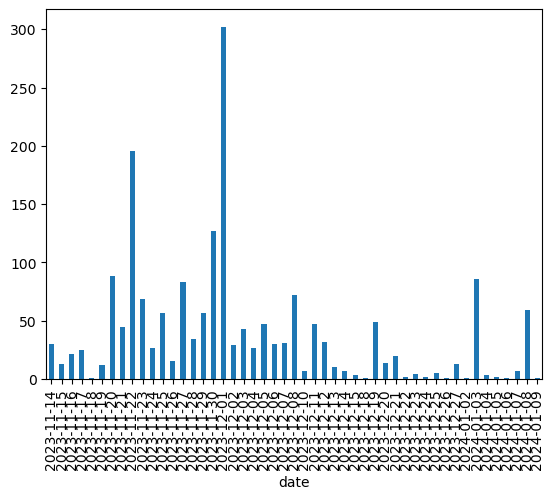

In [6]:
queries_per_day = search_log.groupby(['date'])['date'].count()
queries_per_day.plot(kind='bar')

In [ ]:
unique_visits_per_day = search_log.groupby(['date','session_id'])['session_id'].count()
unique_visits_per_day = unique_visits_per_day.groupby(['date']).count()
#unique_visits_per_day
unique_visits_per_day.plot(kind='bar')

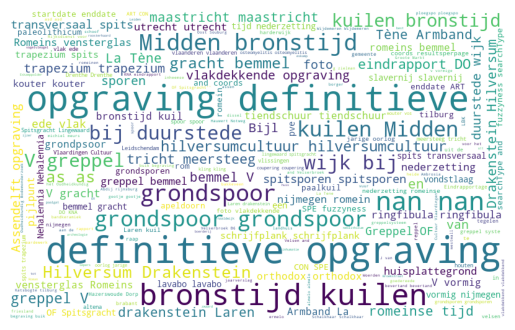

In [8]:
search_log['searchterm'] = search_log['searchterm'].astype(str)
queries = ' '.join(search_log["searchterm"])
wc = WordCloud(background_color='white', 
     stopwords = ['meta'], width = 800, height = 500).generate(queries)
plt.axis("off")
plt.imshow(wc)